<center><h1>HosseinzadehKhaligh_Ehsan_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

###### Name: Ehsan Hosseinzadeh Khaligh
###### USC ID: 1112811250
###### GitHub:  https://github.com/ehsankhaligh

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.7.
The scikit-learn version is 1.0.2.


### a & b
### (a) Get the Vertebral Column Data Set, data set downloaded and located in data folder 
### (b) Pre-Processing and Exploratory Data Analysis

In [4]:
#load into DF
df = pd.read_table("../data/vertebral_column_data/column_2c.dat", sep=' ')
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis','class']
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,AB
1,68.83,22.22,50.09,46.61,105.99,-3.53,AB
2,69.30,24.65,44.31,44.64,101.87,11.21,AB
3,49.71,9.65,28.32,40.06,108.17,7.92,AB
4,40.25,13.92,25.12,26.33,130.33,2.23,AB
5,53.43,15.86,37.17,37.57,120.57,5.99,AB
6,45.37,10.76,29.04,34.61,117.27,-10.68,AB
7,43.79,13.53,42.69,30.26,125.00,13.29,AB
8,36.69,5.01,41.95,31.68,84.24,0.66,AB
9,49.71,13.04,31.33,36.67,108.65,-7.83,AB


In [5]:
df['class'] = df['class'].replace(['NO','AB'], [0,1]) 
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1
5,53.43,15.86,37.17,37.57,120.57,5.99,1
6,45.37,10.76,29.04,34.61,117.27,-10.68,1
7,43.79,13.53,42.69,30.26,125.00,13.29,1
8,36.69,5.01,41.95,31.68,84.24,0.66,1
9,49.71,13.04,31.33,36.67,108.65,-7.83,1


#### i. Scatterplots

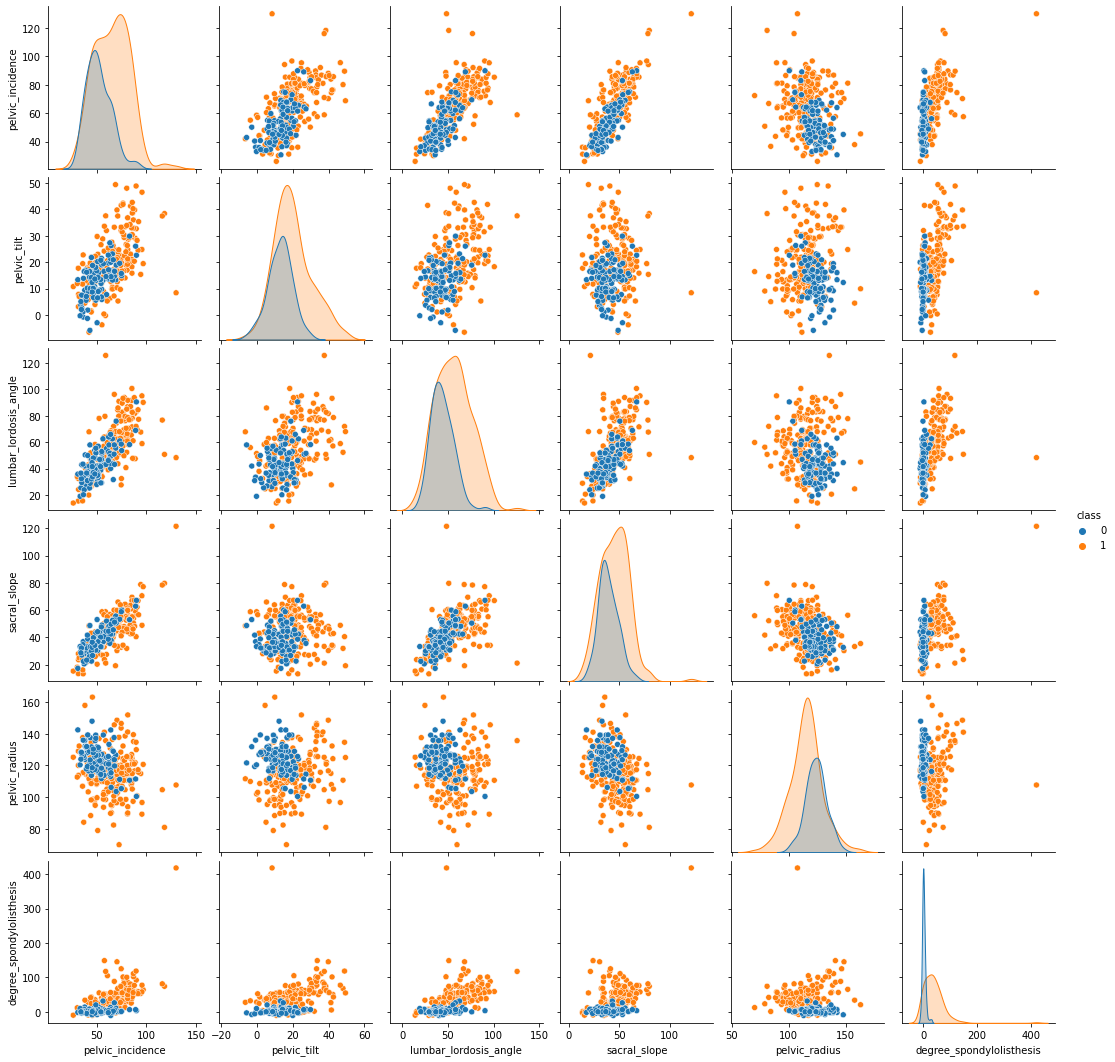

In [6]:
# create the pairplot
sns.pairplot(df, hue='class')

# show the plot
plt.show()

#### ii. Boxplots

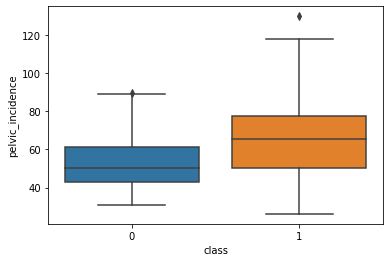

In [7]:
sns.boxplot(x='class', y='pelvic_incidence', data=df)
plt.show()

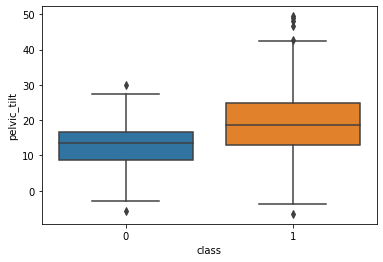

In [8]:
sns.boxplot(x='class', y='pelvic_tilt', data=df)
plt.show()

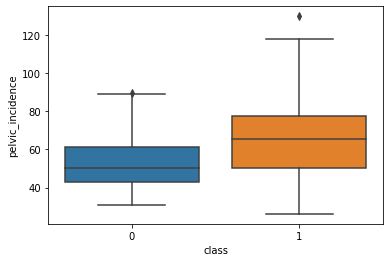

In [9]:
sns.boxplot(x='class', y='pelvic_incidence', data=df)
plt.show()

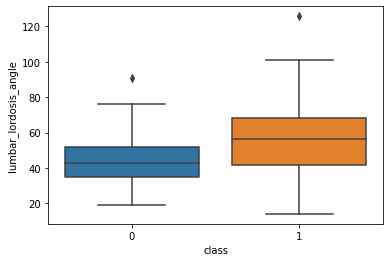

In [10]:
sns.boxplot(x='class', y='lumbar_lordosis_angle', data=df)
plt.show()

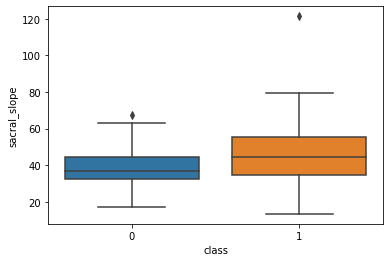

In [11]:
sns.boxplot(x='class', y='sacral_slope', data=df)
plt.show()

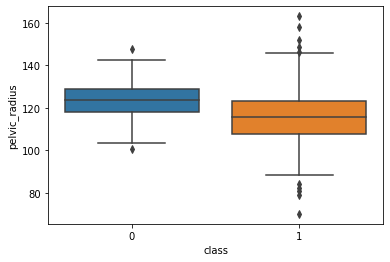

In [12]:
sns.boxplot(x='class', y='pelvic_radius', data=df)
plt.show()

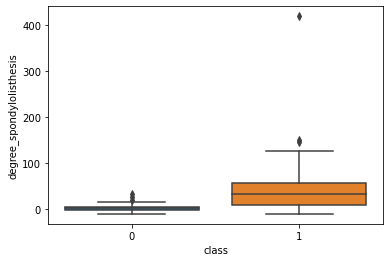

In [13]:
sns.boxplot(x='class', y='degree_spondylolisthesis', data=df)
plt.show()

#### iii. Split Data Set

In [14]:
# filter class 0 rows 
class0_df = df[df['class'] == 0]
print(class0_df.shape)
class0_df

(100, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
209,38.51,16.96,35.11,21.54,127.63,7.99,0
210,54.92,18.97,51.60,35.95,125.85,2.00,0
211,44.36,8.95,46.90,35.42,129.22,4.99,0
212,48.32,17.45,48.00,30.87,128.98,-0.91,0
213,45.70,10.66,42.58,35.04,130.18,-3.39,0
214,30.74,13.35,35.90,17.39,142.41,-2.01,0
215,50.91,6.68,30.90,44.24,118.15,-1.06,0
216,38.13,6.56,50.45,31.57,132.11,6.34,0
217,51.62,15.97,35.00,35.66,129.39,1.01,0
218,64.31,26.33,50.96,37.98,106.18,3.12,0


In [15]:
# select first 70 rows  for training 
class0_training = class0_df.iloc[0:70]
print(class0_training.shape)
class0_training

(70, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
209,38.51,16.96,35.11,21.54,127.63,7.99,0
210,54.92,18.97,51.60,35.95,125.85,2.00,0
211,44.36,8.95,46.90,35.42,129.22,4.99,0
212,48.32,17.45,48.00,30.87,128.98,-0.91,0
213,45.70,10.66,42.58,35.04,130.18,-3.39,0
214,30.74,13.35,35.90,17.39,142.41,-2.01,0
215,50.91,6.68,30.90,44.24,118.15,-1.06,0
216,38.13,6.56,50.45,31.57,132.11,6.34,0
217,51.62,15.97,35.00,35.66,129.39,1.01,0
218,64.31,26.33,50.96,37.98,106.18,3.12,0


In [16]:
# select remaining rows  for testing 
class0_testing = class0_df.iloc[70:]
print(class0_testing.shape)
class0_testing

(30, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
279,50.09,13.43,34.46,36.66,119.13,3.09,0
280,64.26,14.50,43.90,49.76,115.39,5.95,0
281,53.68,13.45,41.58,40.24,113.91,2.74,0
282,49.00,13.11,51.87,35.88,126.40,0.54,0
283,59.17,14.56,43.20,44.60,121.04,2.83,0
284,67.80,16.55,43.26,51.25,119.69,4.87,0
285,61.73,17.11,46.90,44.62,120.92,3.09,0
286,33.04,-0.32,19.07,33.37,120.39,9.35,0
287,74.57,15.72,58.62,58.84,105.42,0.60,0
288,44.43,14.17,32.24,30.26,131.72,-3.60,0


In [17]:
# filter class 1 rows 
class1_df = df[df['class'] == 1]
print(class1_df.shape)
class1_df

(209, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1
5,53.43,15.86,37.17,37.57,120.57,5.99,1
6,45.37,10.76,29.04,34.61,117.27,-10.68,1
7,43.79,13.53,42.69,30.26,125.00,13.29,1
8,36.69,5.01,41.95,31.68,84.24,0.66,1
9,49.71,13.04,31.33,36.67,108.65,-7.83,1


In [18]:
# select first 140 rows  for training 
class1_training = class1_df.iloc[0:140]
print(class1_training.shape)
class1_training

(140, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1
5,53.43,15.86,37.17,37.57,120.57,5.99,1
6,45.37,10.76,29.04,34.61,117.27,-10.68,1
7,43.79,13.53,42.69,30.26,125.00,13.29,1
8,36.69,5.01,41.95,31.68,84.24,0.66,1
9,49.71,13.04,31.33,36.67,108.65,-7.83,1


In [19]:
# select remaining rows  for testing 
class1_testing = class1_df.iloc[140:]
print(class1_testing.shape)
class1_testing

(69, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
140,89.50,48.90,72.00,40.60,134.63,118.35,1
141,85.29,18.28,100.74,67.01,110.66,58.88,1
142,60.63,20.60,64.54,40.03,117.23,104.86,1
143,60.04,14.31,58.04,45.73,105.13,30.41,1
144,85.64,42.69,78.75,42.95,105.14,42.89,1
145,85.58,30.46,78.23,55.12,114.87,68.38,1
146,55.08,-3.76,56.00,58.84,109.92,31.77,1
147,65.76,9.83,50.82,55.92,104.39,39.31,1
148,79.25,23.94,40.80,55.30,98.62,36.71,1
149,81.11,20.69,60.69,60.42,94.02,40.51,1


In [20]:
# merge class 0 & 1 for both training and testing
merged_training_df = pd.merge(class1_training, class0_training, on=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis','class'], how='outer')
merged_testing_df = pd.merge(class1_testing, class0_testing, on=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis','class'], how='outer')


In [21]:
merged_training_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1
5,53.43,15.86,37.17,37.57,120.57,5.99,1
6,45.37,10.76,29.04,34.61,117.27,-10.68,1
7,43.79,13.53,42.69,30.26,125.00,13.29,1
8,36.69,5.01,41.95,31.68,84.24,0.66,1
9,49.71,13.04,31.33,36.67,108.65,-7.83,1


In [22]:
merged_testing_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,89.50,48.90,72.00,40.60,134.63,118.35,1
1,85.29,18.28,100.74,67.01,110.66,58.88,1
2,60.63,20.60,64.54,40.03,117.23,104.86,1
3,60.04,14.31,58.04,45.73,105.13,30.41,1
4,85.64,42.69,78.75,42.95,105.14,42.89,1
5,85.58,30.46,78.23,55.12,114.87,68.38,1
6,55.08,-3.76,56.00,58.84,109.92,31.77,1
7,65.76,9.83,50.82,55.92,104.39,39.31,1
8,79.25,23.94,40.80,55.30,98.62,36.71,1
9,81.11,20.69,60.69,60.42,94.02,40.51,1


In [23]:
#select first 6 columns (features)
x_train = merged_training_df.iloc[: , :6].values.tolist()
x_test = merged_testing_df.iloc[: , :6].values.tolist()

In [24]:
y_train = merged_training_df['class'].tolist()
y_test = merged_testing_df['class'].tolist()

print("y_train:", y_train)
print("len(y_train): ", len(y_train))

print()

print("y_test:", y_test)
print("len(y_test): ", len(y_test))

y_train: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(y_train):  210

y_test: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(y_test):  99


### (c) Classification

#### i. Euclidean Metric

Step 'i' here joined with 'ii'

#### ii. Test Data

In [25]:
# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Loop through different values of k
for k in range(208, 0, -1):
    # Create the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)

    # Make predictions on the train and test data
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)

    # Calculate train and test errors
    train_errors.append(1 - knn.score(x_train, y_train))
    test_errors.append(1 - knn.score(x_test, y_test))


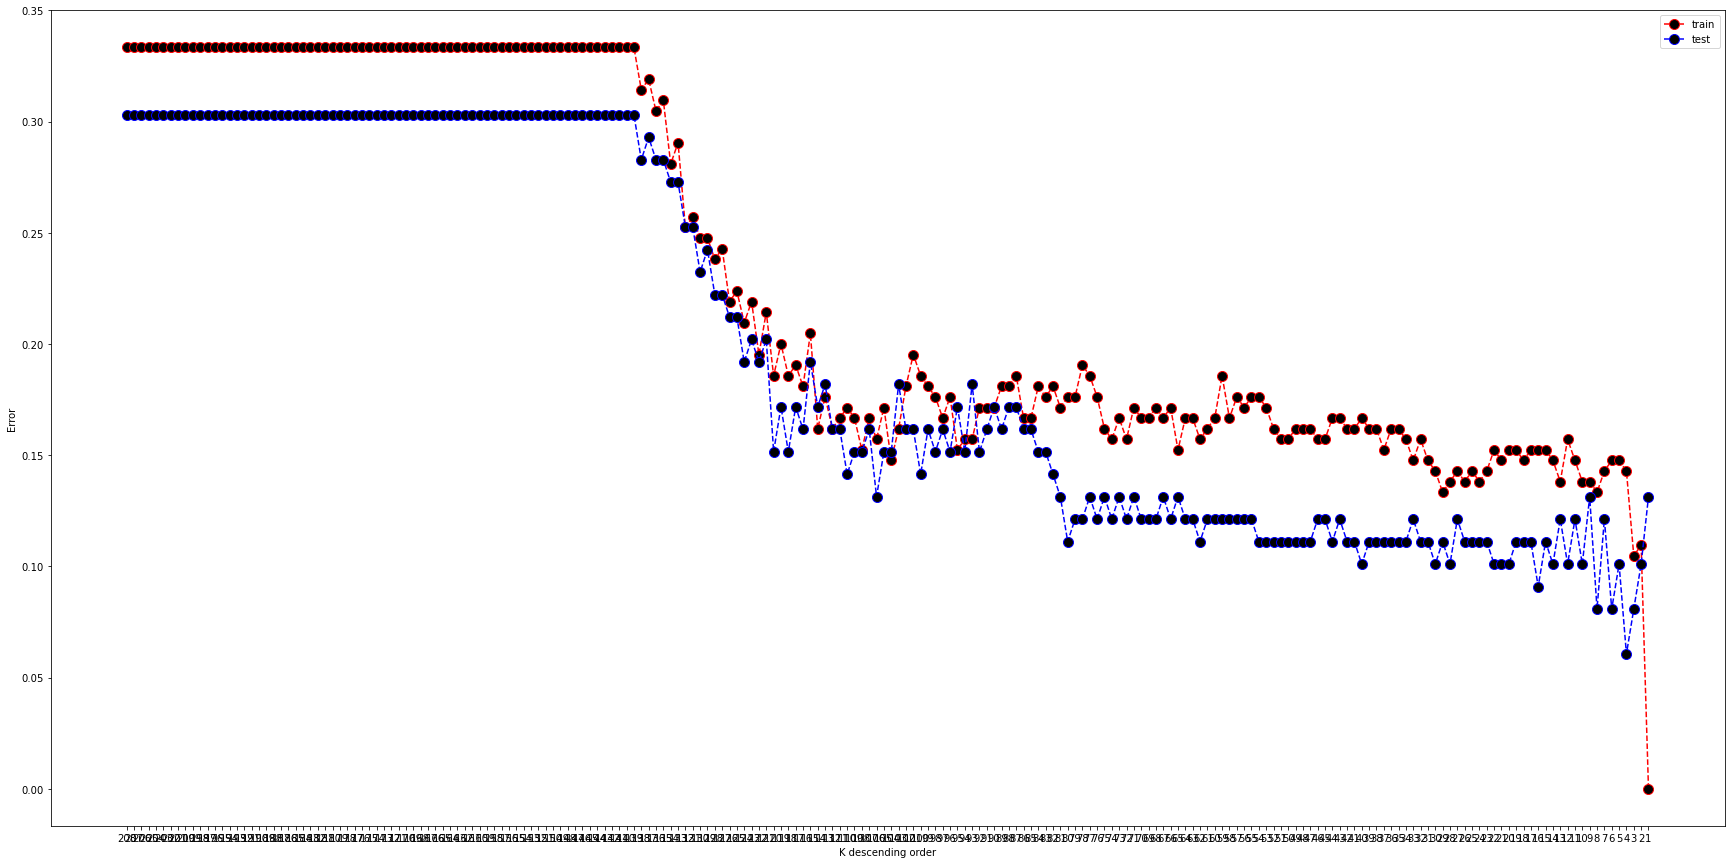

In [26]:
range_list_plt = range(208,0,-1)
plt.figure(figsize=(30,15))
plt.plot(range_list_plt,train_errors,label="train",color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.plot(range_list_plt,test_errors,label="test",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.xlabel('K descending order')
plt.ylabel('Error')
plt.legend()
plt.gca().invert_xaxis()
plt.xticks(np.arange(208,0,-1))
plt.show()

Which k∗ is the most suitable k among those values? Around ~4 K is the best (lowest test error)

In [27]:
# Create the k-NN classifier with k = k_star
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)

#print(y_test)
#print(y_pred)

# Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive_rate = recall_score(y_test, y_pred)
true_negative_rate = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("conf_matrix=\n", conf_matrix, "\n")
print("true_positive_rate=", true_positive_rate, "\n")
print("true_negative_rate=", true_negative_rate, "\n")
print("precision=", precision, "\n")
print("f1=", f1)

conf_matrix=
 [[25  5]
 [ 1 68]] 

true_positive_rate= 0.9855072463768116 

true_negative_rate= 0.8333333333333334 

precision= 0.9315068493150684 

f1= 0.9577464788732394


#### iii. Learning Curve

In [28]:
class0_training

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
209,38.51,16.96,35.11,21.54,127.63,7.99,0
210,54.92,18.97,51.60,35.95,125.85,2.00,0
211,44.36,8.95,46.90,35.42,129.22,4.99,0
212,48.32,17.45,48.00,30.87,128.98,-0.91,0
213,45.70,10.66,42.58,35.04,130.18,-3.39,0
214,30.74,13.35,35.90,17.39,142.41,-2.01,0
215,50.91,6.68,30.90,44.24,118.15,-1.06,0
216,38.13,6.56,50.45,31.57,132.11,6.34,0
217,51.62,15.97,35.00,35.66,129.39,1.01,0
218,64.31,26.33,50.96,37.98,106.18,3.12,0


In [29]:
class1_training

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1
5,53.43,15.86,37.17,37.57,120.57,5.99,1
6,45.37,10.76,29.04,34.61,117.27,-10.68,1
7,43.79,13.53,42.69,30.26,125.00,13.29,1
8,36.69,5.01,41.95,31.68,84.24,0.66,1
9,49.71,13.04,31.33,36.67,108.65,-7.83,1


In [30]:
class1_testing

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
140,89.50,48.90,72.00,40.60,134.63,118.35,1
141,85.29,18.28,100.74,67.01,110.66,58.88,1
142,60.63,20.60,64.54,40.03,117.23,104.86,1
143,60.04,14.31,58.04,45.73,105.13,30.41,1
144,85.64,42.69,78.75,42.95,105.14,42.89,1
145,85.58,30.46,78.23,55.12,114.87,68.38,1
146,55.08,-3.76,56.00,58.84,109.92,31.77,1
147,65.76,9.83,50.82,55.92,104.39,39.31,1
148,79.25,23.94,40.80,55.30,98.62,36.71,1
149,81.11,20.69,60.69,60.42,94.02,40.51,1


In [31]:
class0_testing

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
279,50.09,13.43,34.46,36.66,119.13,3.09,0
280,64.26,14.50,43.90,49.76,115.39,5.95,0
281,53.68,13.45,41.58,40.24,113.91,2.74,0
282,49.00,13.11,51.87,35.88,126.40,0.54,0
283,59.17,14.56,43.20,44.60,121.04,2.83,0
284,67.80,16.55,43.26,51.25,119.69,4.87,0
285,61.73,17.11,46.90,44.62,120.92,3.09,0
286,33.04,-0.32,19.07,33.37,120.39,9.35,0
287,74.57,15.72,58.62,58.84,105.42,0.60,0
288,44.43,14.17,32.24,30.26,131.72,-3.60,0


From pre-processing stage -> x_test, y_test -> no change

In [32]:
def rowSelection(n):
    class0_first_rows = n//3 
    class1_first_rows = n-(n//3)
    
    class0_training_subset = class0_training.iloc[0:class0_first_rows]
    class1_testing_sebset = class1_training.iloc[0:class1_first_rows]
    
    #print("class0_first_rows=", class0_first_rows)
    #print("class1_first_rows=", class1_first_rows)
    
    class01_training_subset_merged =  pd.merge(class0_training_subset, class1_testing_sebset, on=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis','class'], how='outer')
    
    #print("class0_training_subset.shape=", class0_training_subset.shape)
    #print("class1_testing_sebset.shape=", class1_testing_sebset.shape)
    #print("class01_training_subset_merged.shape=", class01_training_subset_merged.shape)
    
    return class01_training_subset_merged
    
#rowSelection(10) #test

In [33]:
optimal_k_list = []
optimal_test_error_list = []

for N in range(10, 220, 10):
    
    print("N =", N)
    
    subset_df = rowSelection(N)
    x_train_sebset = subset_df.iloc[: , :6].values.tolist()
    y_train_sebset = subset_df['class'].tolist()
        
    #print(x_train_sebset)
    #print(y_train_sebset)
    
    trainErrors = []
    testErrors = []
    
    for k in range(1, N, 5):
        print("k =", k)
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        # Fit the classifier to the training data
        knn.fit(x_train_sebset, y_train_sebset)

        # Make predictions on the train and test data
        y_train_pred = knn.predict(x_train_sebset)
        y_test_pred = knn.predict(x_test)
        
        # Calculate train and test errors
        trainErrors.append(1 - knn.score(x_train_sebset, y_train_sebset))
        testErrors.append(1 - knn.score(x_test, y_test))
        
    k_star = 1 + 5 * np.argmin(testErrors)
    print("k_star =", k_star)
    optimal_k_list.append(k_star)
    
    #calculate best k error -> knn
    knn = KNeighborsClassifier(n_neighbors=k_star, metric='euclidean')

    # Fit the classifier to the training data
    knn.fit(x_train_sebset, y_train_sebset)
    
    # Calculate train and test errors
    optimal_test_error_list.append(1 - knn.score(x_test, y_test))
    
    print("------------")

print("optimal_k_list =", optimal_k_list)
print("optimal_test_error_list =", optimal_test_error_list)

N = 10
k = 1
k = 6
k_star = 1
------------
N = 20
k = 1
k = 6
k = 11
k = 16
k_star = 6
------------
N = 30
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k_star = 1
------------
N = 40
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k = 31
k = 36
k_star = 16
------------
N = 50
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k = 31
k = 36
k = 41
k = 46
k_star = 16
------------
N = 60
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k = 31
k = 36
k = 41
k = 46
k = 51
k = 56
k_star = 21
------------
N = 70
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k = 31
k = 36
k = 41
k = 46
k = 51
k = 56
k = 61
k = 66
k_star = 31
------------
N = 80
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k = 31
k = 36
k = 41
k = 46
k = 51
k = 56
k = 61
k = 66
k = 71
k = 76
k_star = 31
------------
N = 90
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k = 31
k = 36
k = 41
k = 46
k = 51
k = 56
k = 61
k = 66
k = 71
k = 76
k = 81
k = 86
k_star = 41
------------
N = 100
k = 1
k = 6
k = 11
k = 16
k = 21
k = 26
k = 31
k = 36
k = 41
k = 46
k = 51
k = 56
k = 61
k = 66

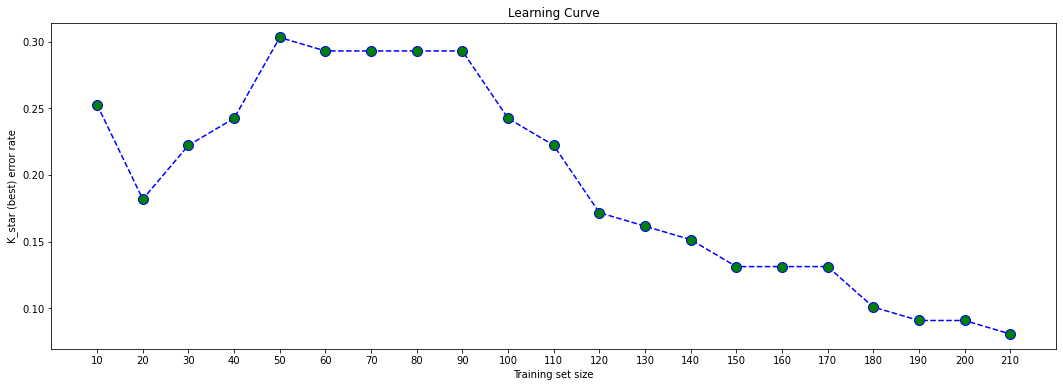

In [34]:
list_range=range(10,211,10)
plt.figure(figsize=(18,6))
plt.plot(list_range,optimal_test_error_list, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'green', markersize = 10)
plt.xlabel('Training set size')
plt.ylabel('K_star (best) error rate')
plt.xticks(np.arange(10,211,10))
plt.title('Learning Curve')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [35]:
#getting x_train, y_train, x_test, y_test from pre-processing step
test_error_list = list()
train_error_list = list()

for k in range(1,197,5):    
    knn = KNeighborsClassifier(n_neighbors=k,p=1,metric = 'manhattan')
    knn.fit(x_train, y_train)
    prediction= knn.predict(x_test)

    train_error_list.append(1 - knn.score(x_train, y_train))
    test_error_list.append(1 - knn.score(x_test,y_test))

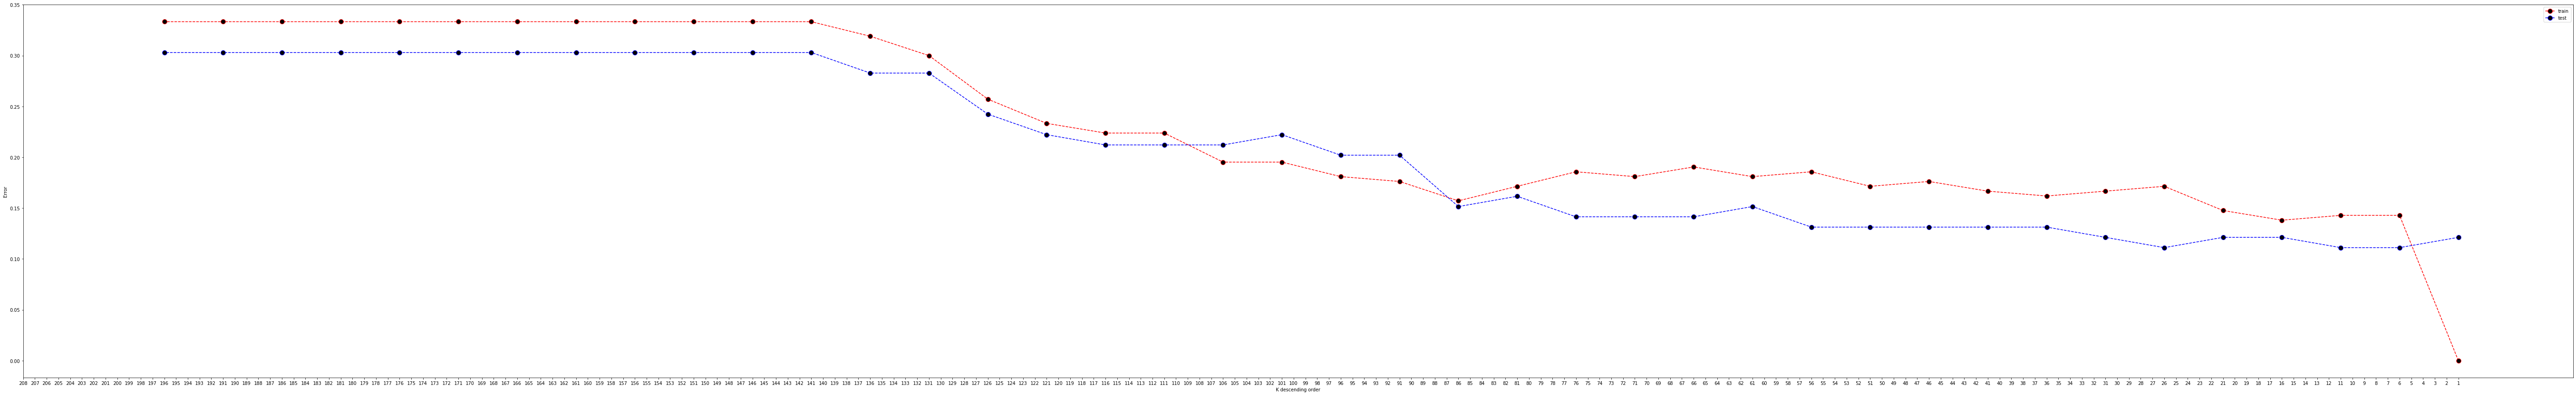

Best Error rate is where K having  0.11111111111111116  error


In [36]:
range_list_plt = range(1,197,5)
plt.figure(figsize=(100,15))
plt.plot(range_list_plt,train_error_list,label="train",color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.plot(range_list_plt,test_error_list,label="test",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.xlabel('K descending order')
plt.ylabel('Error')
plt.legend()
plt.gca().invert_xaxis()
plt.xticks(np.arange(208,0,-1))
plt.show()
print("Best Error rate is where K having ", min(test_error_list), " error")

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [37]:
test_accuracy = []
log_list = []

best_k = 6 #above graph 

# Loop through different values of log10(p)
for p in range(1, 10):
    log_p = p/10
    log_list.append(log_p)
    # Create the k-NN classifier with Minkowski distance and log10(p)
    knn = KNeighborsClassifier(n_neighbors=best_k, p=10**log_p, metric='minkowski')
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    # Predict the labels for the test data
    y_pred = knn.predict(x_test)
    # Calculate the accuracy score for the current value of log10(p)
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy score to the list
    test_accuracy.append(accuracy)

# Find the index of the best value of log10(p)
best_p_index = np.argmax(test_accuracy)

# Find the best value of log10(p)
best_log_p = best_p_index/10

print("best_log_p = ", best_log_p)
print("best test error: ", min(test_accuracy))

best_log_p =  0.5
best test error:  0.9090909090909091


##### C. Chebyshev Distance With p -> infinity.

In [38]:
test_error_Chebyshev = []
train_error_Chebyshev = []

for k in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors = k, p=float("inf"), metric = 'chebyshev')
    knn.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
        
    # Calculate train and test errors
    train_error_Chebyshev.append(1 - knn.score(x_train, y_train))
    test_error_Chebyshev.append(1 - knn.score(x_test, y_test))

In [39]:
len(train_error_Chebyshev)

40

In [40]:
len(test_error_Chebyshev)

40

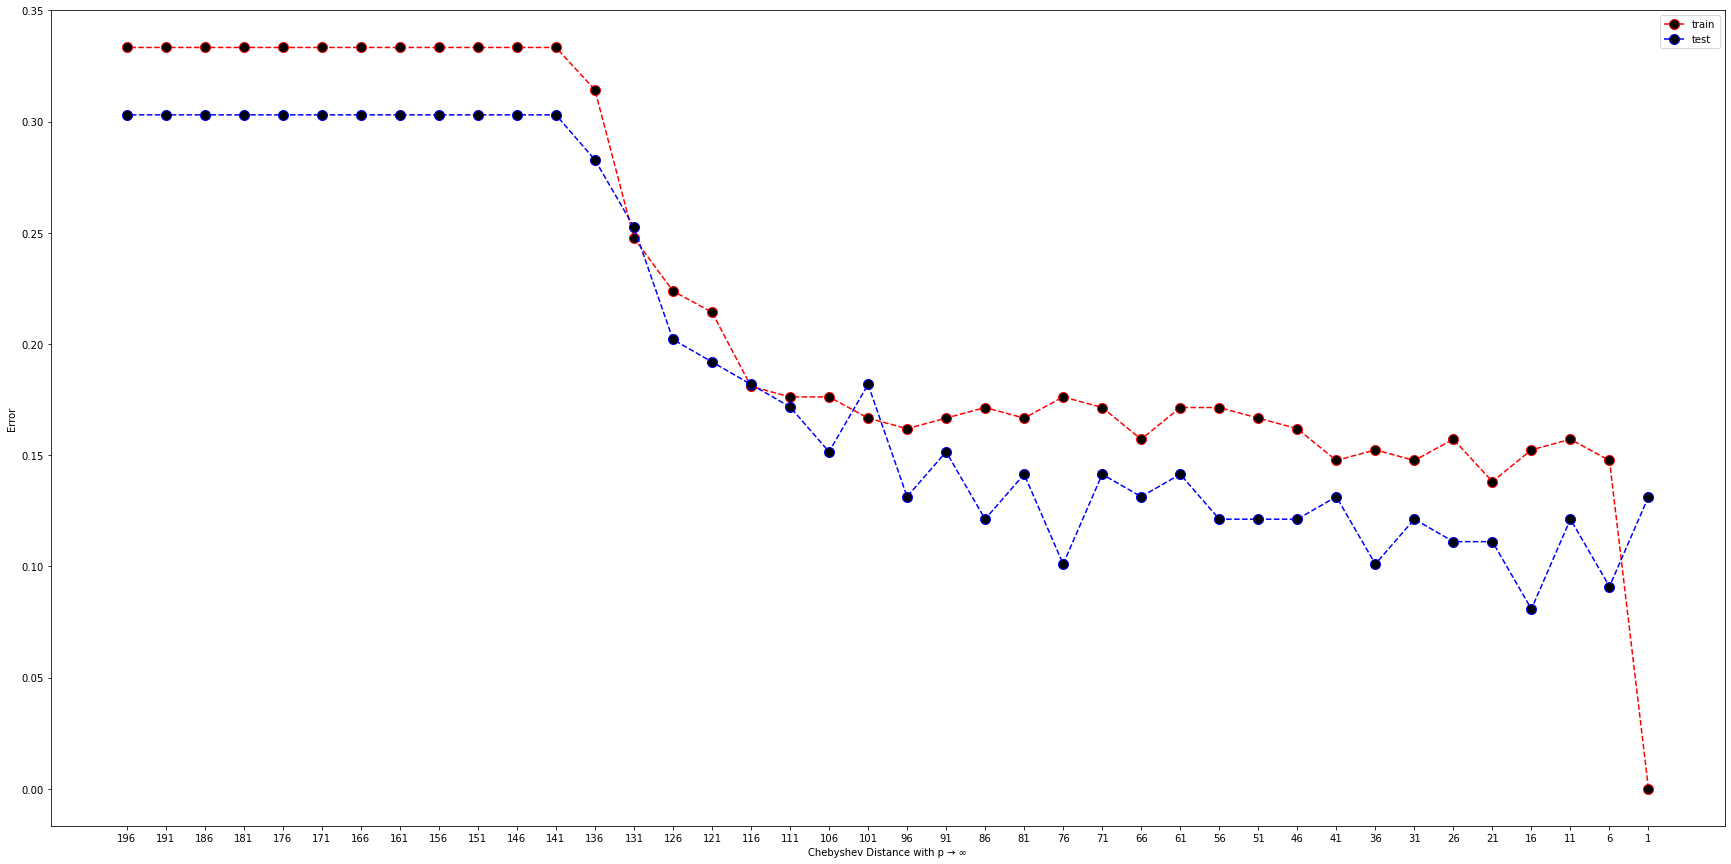

Min Error on k =~ 16 is  0.08080808080808077


In [41]:
range_list_plt = range(1,197,5)
plt.figure(figsize=(30,15))
plt.plot(range_list_plt,train_error_Chebyshev,label="train",color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.plot(range_list_plt,test_error_Chebyshev,label="test",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.xlabel('Chebyshev Distance with p → ∞')
plt.ylabel('Error')
plt.legend()
plt.gca().invert_xaxis()
plt.xticks(range(1,197,5))
plt.show()
print("Min Error on k =~ 16 is ", min(test_error_Chebyshev))

#### ii. Mahalanobis Distance.

In [42]:

train_error_Mahalanobis = []
test_error_Mahalanobis = []

for k in range(1,197,5):
    
    knn = KNeighborsClassifier(n_neighbors=k, metric_params = {'VI' : np.cov(x_train, rowvar = False)}, metric = 'mahalanobis')
    #neighbor.n_neighbors=k 
    knn.fit(x_train,y_train)
    y_pred_mahalanobis = knn.predict(x_test)
    
    # Make predictions on the train and test data
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    
    train_error_Mahalanobis.append(1 - knn.score(x_train, y_train))
    test_error_Mahalanobis.append(1 - knn.score(x_test, y_test))
    


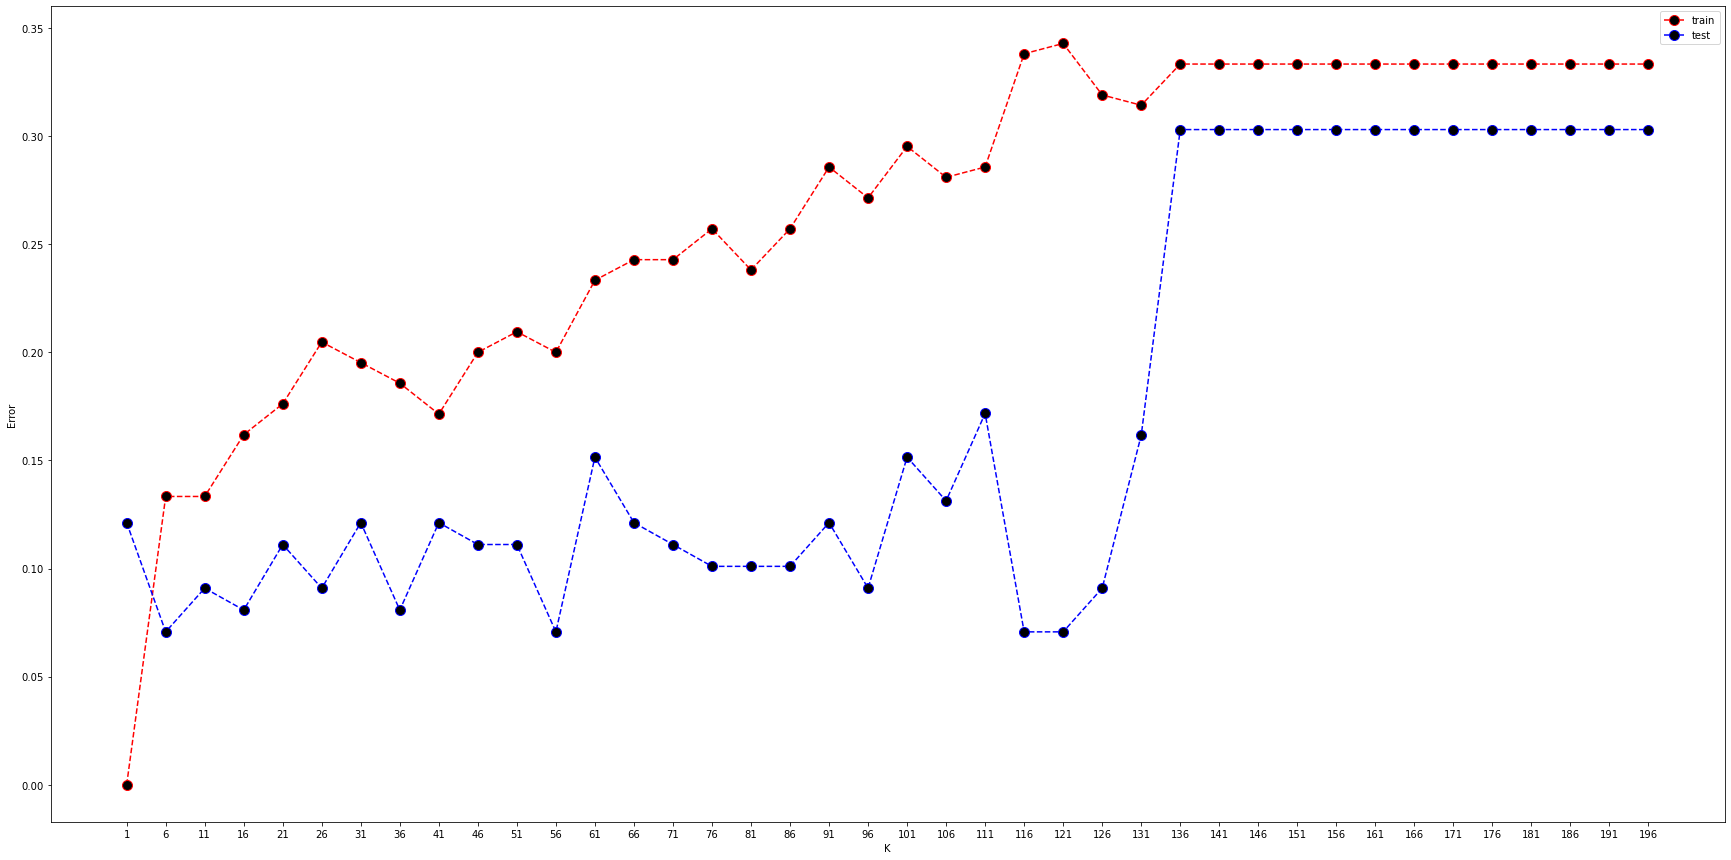

Min Error on 5, 56, 116 < k < 121 is  0.07070707070707072


In [43]:
range_list_plt = range(1,197,5)
plt.figure(figsize=(30,15))
plt.plot(range_list_plt,train_error_Mahalanobis,label="train",color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.plot(range_list_plt,test_error_Mahalanobis,label="test",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.show()
print("Min Error on 5, 56, 116 < k < 121 is ", min(test_error_Mahalanobis))

In [44]:
#find j values with lowest error
for index, num in enumerate(test_error_Mahalanobis):
    if num ==0.07070707070707072:
        print(index, num)  
        
number = [x for x in range(1,197,5)]
print(number[1])
print(number[11])
print(number[23])
print(number[24])

1 0.07070707070707072
11 0.07070707070707072
23 0.07070707070707072
24 0.07070707070707072
6
56
116
121


#### Table:   

| Distance Type | p | Best k | Best Test error |
| :- | -: | -: | :-: |
| Manhattan | 1 | ~6, 11, 26 | 0.11 |
| Manhattan (log)| 0.5 | 6 | 0.90 |
| Chebyshev |∞| 16 | 0.08 |
| Mahalanobis | * | 6, 56, 116 < k < 121 | 0.07 |


  '*' -> in tutorial examples KNeighborsClassifier(n_neighbors=k, metric_params = {'VI' : np.cov(x_train, rowvar = False)}, metric = 'mahalanobis') p was not given

### (e) Weighted Decision

Euclidean

In [45]:
train_Euclidean_weighted_decision_error = []
test_Euclidean_weighted_decision_error = []

for i in range(1,197,5):    
    
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean', weights = 'distance')
    
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)

    # Make predictions on the train and test data
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)

    # Calculate train and test errors
    train_Euclidean_weighted_decision_error.append(1 - knn.score(x_train, y_train))
    test_Euclidean_weighted_decision_error.append(1 - knn.score(x_test, y_test))

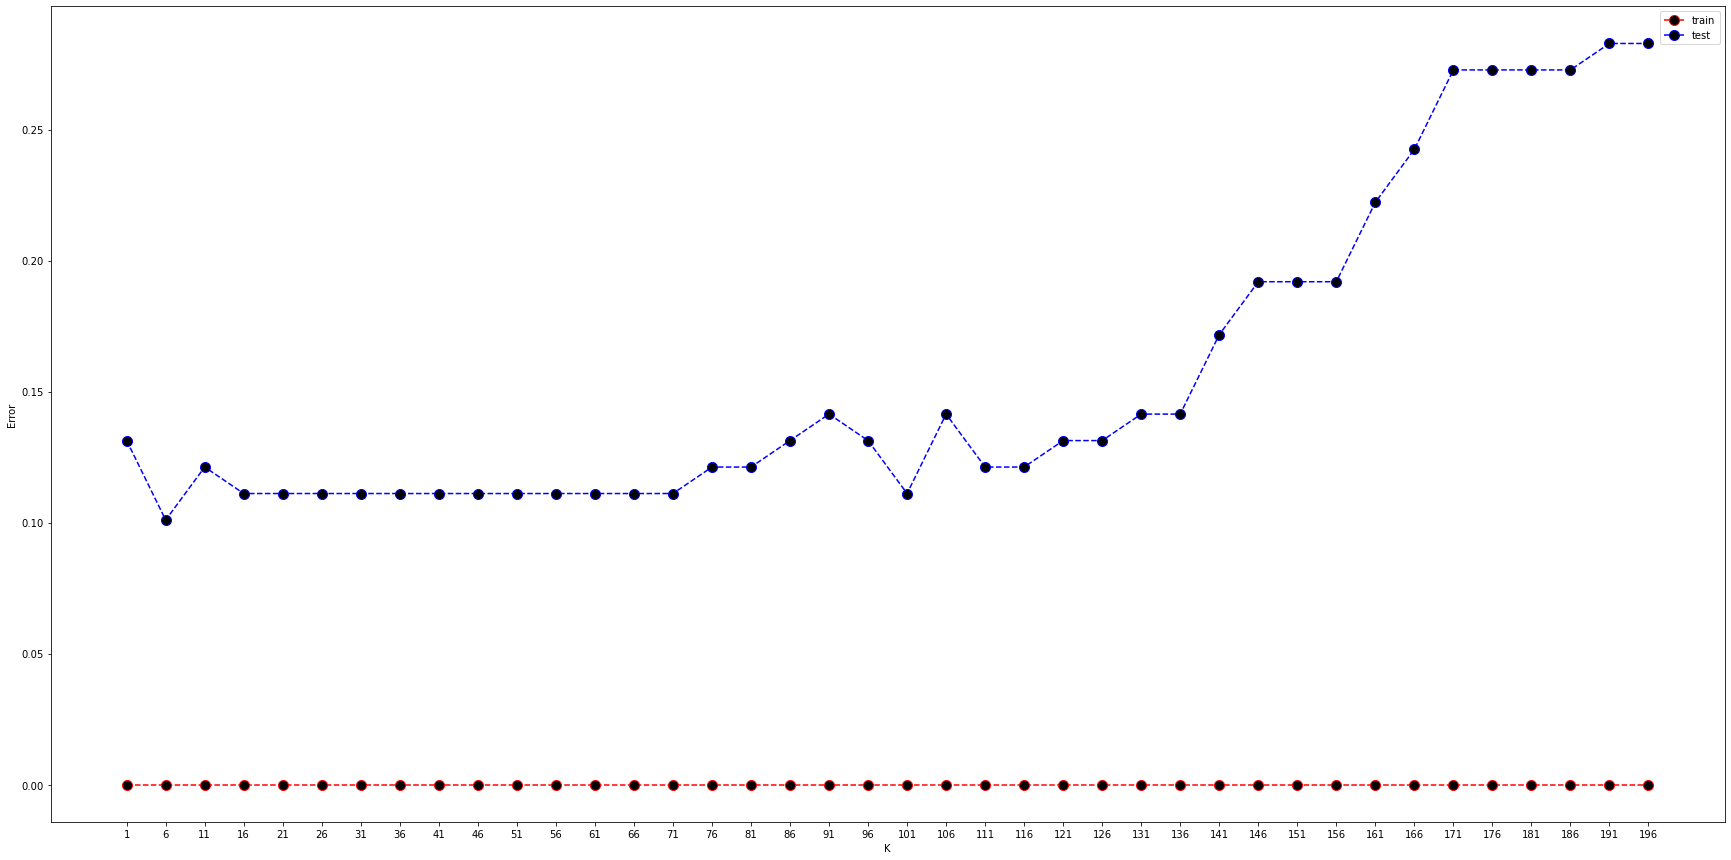

Min Error when k =~ 6 is  0.101010101010101


In [46]:
range_list_plt = range(1,197,5)
plt.figure(figsize=(30,15))
plt.plot(range_list_plt,train_Euclidean_weighted_decision_error,label="train",color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.plot(range_list_plt,test_Euclidean_weighted_decision_error,label="test",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.show()
print("Min Error when k =~ 6 is ", min(test_Euclidean_weighted_decision_error))

Manhattan

In [47]:
train_Manhattan_weighted_decision_error = []
test_Manhattan_weighted_decision_error = []

for i in range(1,197,5):    
    
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan', weights = 'distance')
    
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)

    # Make predictions on the train and test data
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)

    # Calculate train and test errors
    train_Manhattan_weighted_decision_error.append(1 - knn.score(x_train, y_train))
    test_Manhattan_weighted_decision_error.append(1 - knn.score(x_test, y_test))

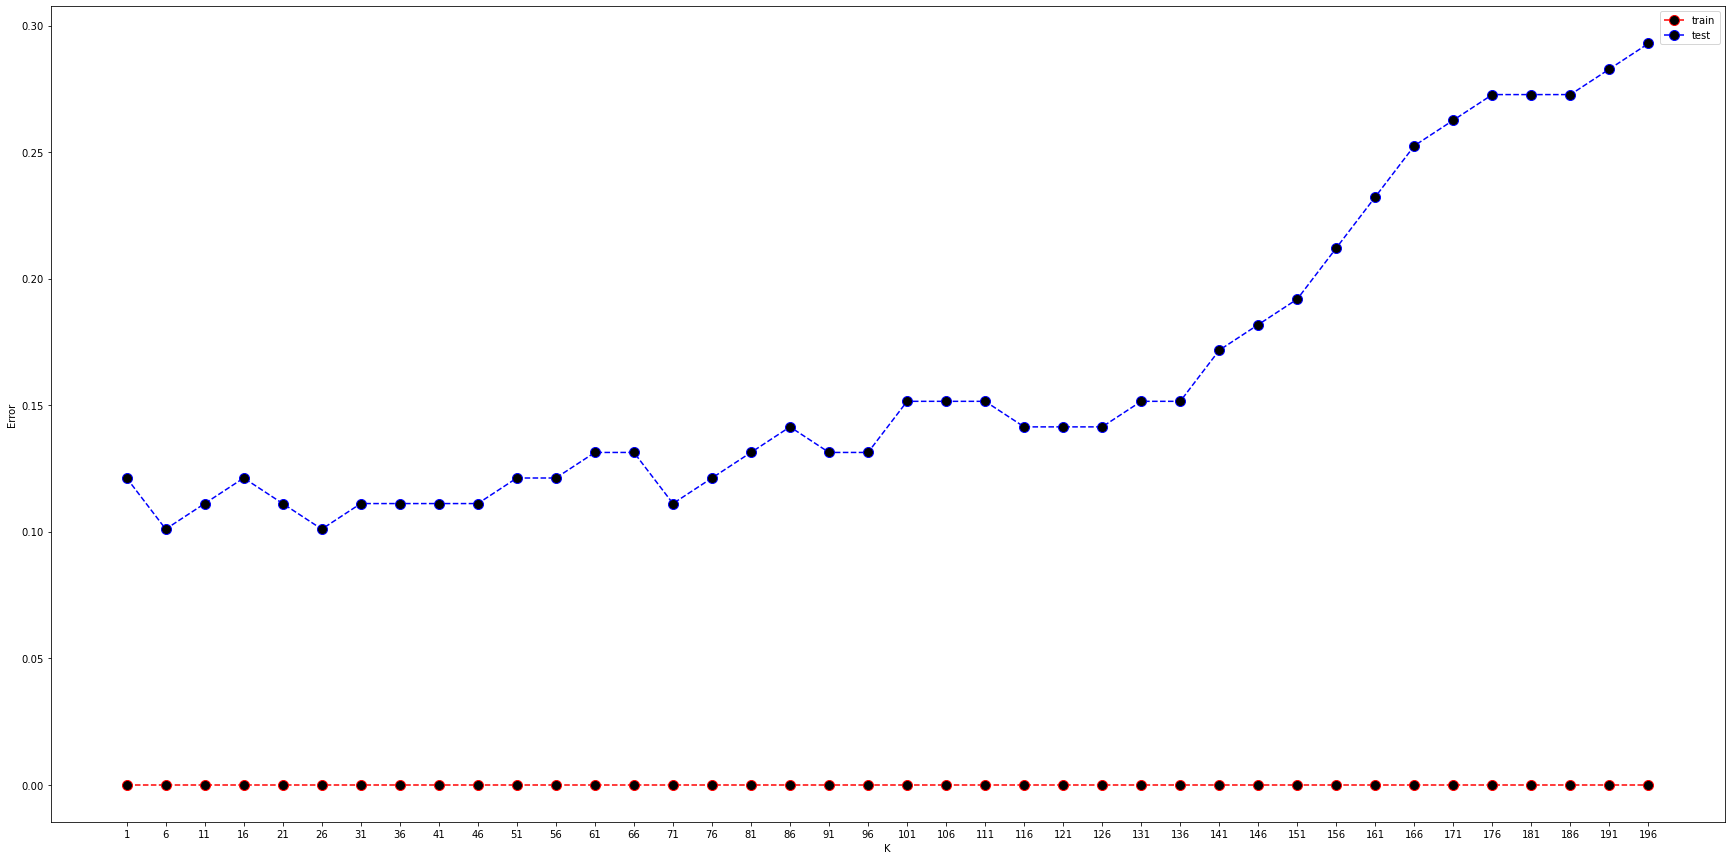

Min Error when k =~ 6, 26  is  0.101010101010101


In [48]:
range_list_plt = range(1,197,5)
plt.figure(figsize=(30,15))
plt.plot(range_list_plt,train_Manhattan_weighted_decision_error,label="train",color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.plot(range_list_plt,test_Manhattan_weighted_decision_error,label="test",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.show()
print("Min Error when k =~ 6, 26  is ", min(test_Manhattan_weighted_decision_error))

Chebyshev

In [49]:
train_Chebyshev_weighted_decision_error = []
test_Chebyshev_weighted_decision_error = []

for i in range(1,197,5):    
    
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'chebyshev', weights = 'distance')
    
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)

    # Make predictions on the train and test data
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)

    # Calculate train and test errors
    train_Chebyshev_weighted_decision_error.append(1 - knn.score(x_train, y_train))
    test_Chebyshev_weighted_decision_error.append(1 - knn.score(x_test, y_test))

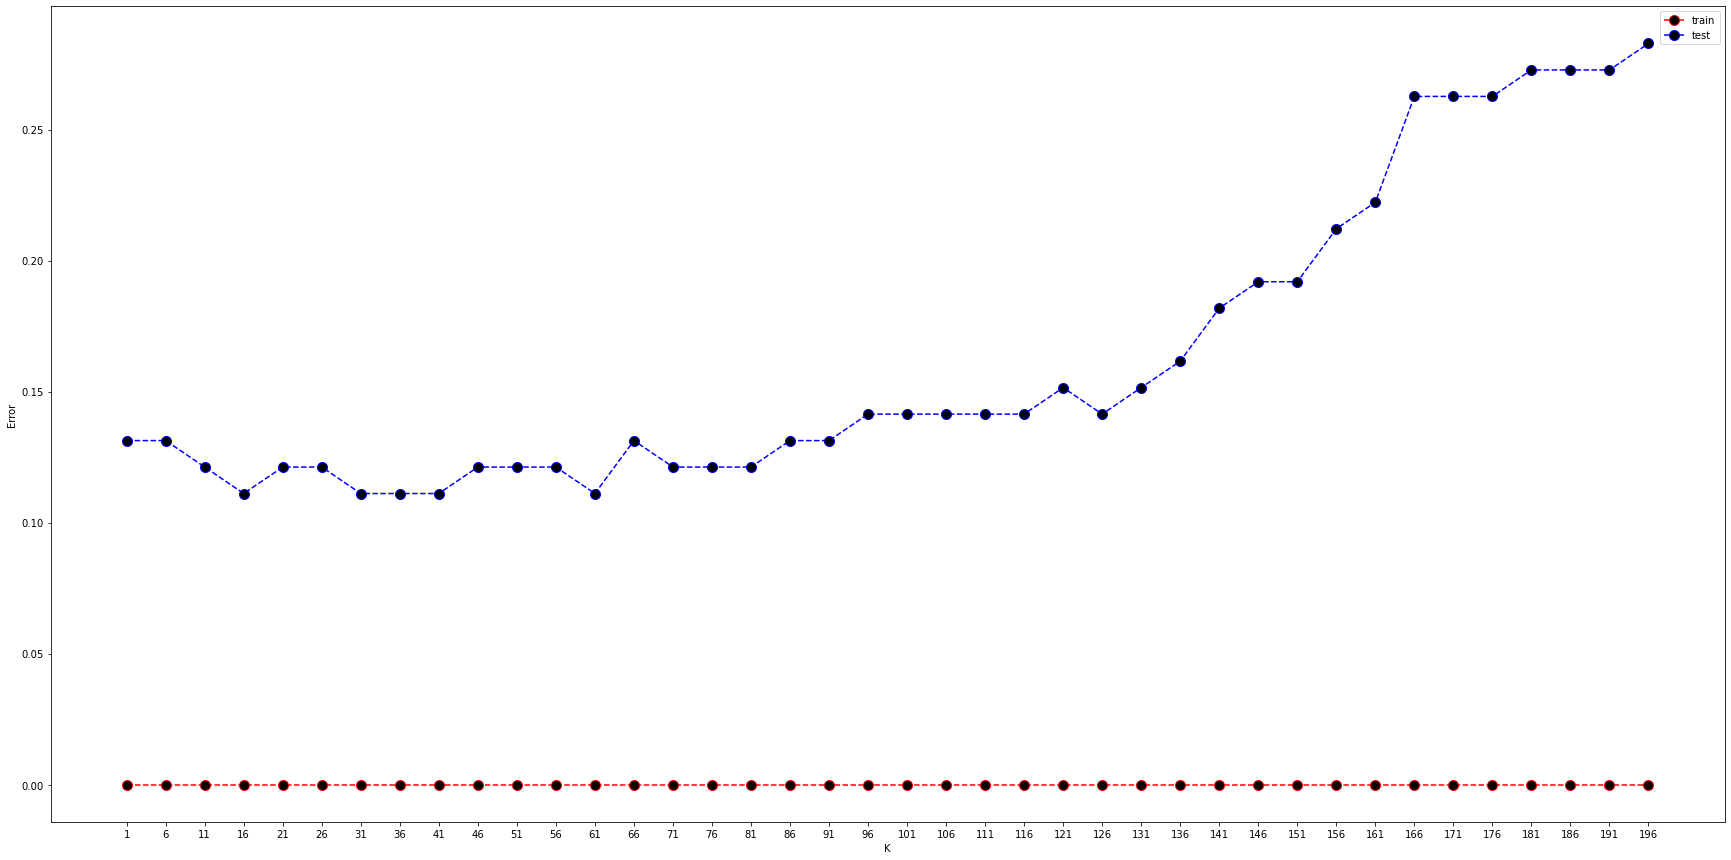

Min Error when k =~ 16, 25 to 41, & 55 is  0.11111111111111116


In [50]:
range_list_plt = range(1,197,5)
plt.figure(figsize=(30,15))
plt.plot(range_list_plt,train_Chebyshev_weighted_decision_error,label="train",color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.plot(range_list_plt,test_Chebyshev_weighted_decision_error,label="test",color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.xticks(range(1,197,5))
plt.show()
print("Min Error when k =~ 16, 25 to 41, & 55 is ", min(test_Chebyshev_weighted_decision_error))

#### Table:   

| Distance Type | Best K | Best Test error |
| :- | -: | :-: |
| Euclidean | 6 | 0.10 |
| Manhattan | 6, 26 | 0.10 |
| Chebyshev | 16, 25 to 41, 55 | 0.11 |



### (f) Training Error Rate

What is the lowest training error rate you achieved in this homework? The lowest if we round ~0 (0.07)